<a href="https://colab.research.google.com/github/lilhast1/PointCloudAlgorithms/blob/main/collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import kaggle dataseta (nije koristen nigdje dalje)

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 KB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 KB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 2.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102990 sha256=9295308ece22fee14cd72fdef4fbcbb0c011f8ad48f69897736b5e85d6bcfdc4
  Stored in directory: /home/hasti/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle


In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kmader/point-cloud-segmentation

Dataset URL: https://www.kaggle.com/datasets/kmader/point-cloud-segmentation
License(s): CC-BY-NC-SA-4.0
 99% 687M/693M [00:06<00:00, 146MB/s]
100% 693M/693M [00:06<00:00, 106MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('point-cloud-segmentation.zip', 'r') as zip_ref:
    zip_ref.extractall('destination_directory')

In [ ]:
# Open the text file in read mode
with open("/content/destination_directory/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb.txt", "r") as file:
    # Read the first 5 lines
    for i in range(5):
        line = file.readline()
        print(line)

20.623 40.276 -1.999 -1031 127 141 154

20.362 40.375 -2.239 -941 130 141 159

20.36 40.376 -2.402 -1083 139 151 165

20.374 40.367 -2.405 -1122 131 147 163

20.372 40.366 -2.405 -1165 132 145 161



In [ ]:
%matplotlib inline
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
all_paths = [os.path.join(path, file) for path, _, files in os.walk(top = os.path.join('..', 'input'))
             for file in files if ('.labels' in file) or ('.txt' in file)]
label_names = {0: 'unlabeled', 1: 'man-made terrain', 2: 'natural terrain', 3: 'high vegetation', 4: 'low vegetation', 5: 'buildings', 6: 'hard scape', 7: 'scanning artefacts', 8: 'cars'}

In [ ]:
all_files_df = pd.DataFrame({'path': all_paths})
all_files_df['basename'] = all_files_df['path'].map(os.path.basename)
all_files_df['id'] = all_files_df['basename'].map(lambda x: os.path.splitext(x)[0])
all_files_df['ext'] = all_files_df['basename'].map(lambda x: os.path.splitext(x)[1][1:])
all_files_df.sample(5)

ValueError: a must be greater than 0 unless no samples are taken

## DBSCAN
pokrenut kod sa linka https://ai-robotic.de/exploring-clustering-and-visualization-of-3d-point-cloud-datausing-python/

In [ ]:
pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d

In [ ]:
np.random.seed(1)
num_points = 300
cluster_params = [
 {"mean": np.array([0, 0, 0]), "cov": np.array([[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]])},
 {"mean": np.array([4, 4, 4]), "cov": np.array([[1, -0.8, -0.8], [-0.8, 1, -0.8], [-0.8, -0.8, 1]])},
 {"mean": np.array([-3, -4, -5]), "cov": np.array([[1, -0.8, -0.8], [-0.8, 1, -0.8], [-0.8, -0.8, 1]])}
]

clusters = []
for param in cluster_params:
 cluster = np.random.multivariate_normal(param["mean"], param["cov"], num_points // 3)
 clusters.append(cluster)
points = np.vstack(clusters)

<ipython-input-13-c6ec0e621b40>:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  cluster = np.random.multivariate_normal(param["mean"], param["cov"], num_points // 3)


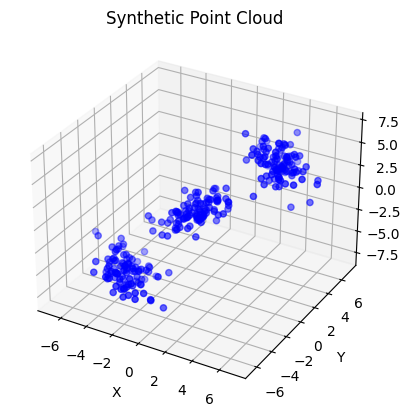

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Synthetic Point Cloud')
plt.show()

In [ ]:
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(points)
eps = 1.2 # Distance threshold for points in a cluster
min_points = 10 # Minimum number of points per cluster
dbscan_labels = np.array(point_cloud.cluster_dbscan(eps=eps, min_points=min_points, print_progress=True))

print("Cluster labels (with -1 indicating noise): ")
print(f"Labels: {dbscan_labels}")

Cluster labels (with -1 indicating noise): 
Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1
  2  2  2  2 -1  2  2  2  2  2  2 -1 -1  2  2  2  2  2  2  2  2 -1  2  2
  2  2  2  2 -1  2 -1 -1  2  2  2  2  2  2 -1  2 -1  2  2  2  2  2  2 -1
  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2 -1  2  2  2 -1  2  2
  2  2 -1  2  2  2  2  2  2 -1  2  2]


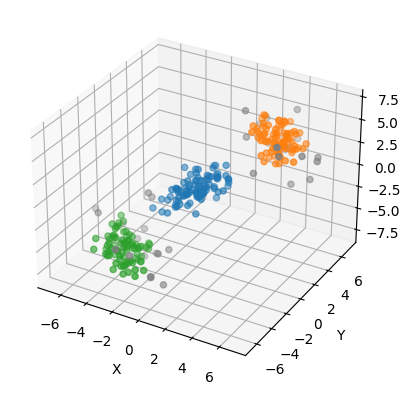

In [ ]:
colors = plt.get_cmap("tab10")(dbscan_labels)
colors[dbscan_labels == -1] = [0.5, 0.5, 0.5, 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

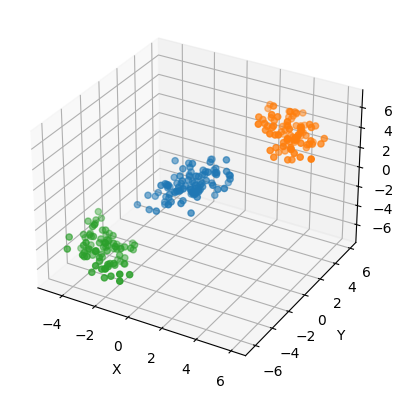

In [ ]:
# Filter out noise points
filtered_points = points[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Generate colors for the remaining points
colors = plt.get_cmap("tab10")(filtered_labels)

# Create the 3D scatter plot with filtered points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_points[:, 0], filtered_points[:, 1], filtered_points[:, 2], c=colors)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## RANSAC
sa linka https://medium.com/@ajithraj_gangadharan/3d-ransac-algorithm-for-lidar-pcd-segmentation-315d2a51351

In [ ]:
!git clone https://github.com/ajith3530/Python_RANSAC.git

Cloning into 'Python_RANSAC'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 39 (delta 13), reused 34 (delta 8), pack-reused 0
Receiving objects: 100% (39/39), 29.64 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
cd Python_RANSAC/

/content/Python_RANSAC


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!python ransac_main.py

[Open3D WARNING] Read PCD failed: unable to open file: point_cloud_data_sample_2.pcd
Traceback (most recent call last):
  File "/content/Python_RANSAC/ransac_main.py", line 122, in <module>
    point_cloud = pd.DataFrame(pcd.points, columns={"X" ,"Y" ,"Z"})
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 675, in __init__
    raise ValueError("columns cannot be a set")
ValueError: columns cannot be a set


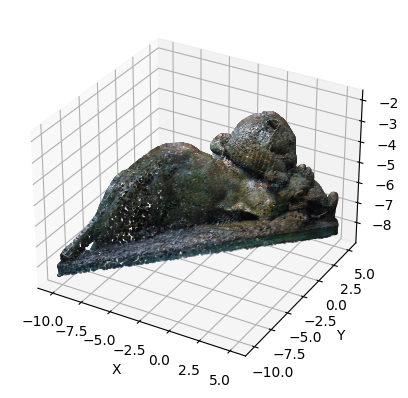

In [ ]:
import pandas as pd
point_cloud = pd.read_csv("point_cloud_data_sample.xyz", delimiter=" ", nrows=90306)
#point_cloud = point_cloud.iloc[:, :3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point_cloud["X"], point_cloud["X"], point_cloud["Z"], c=point_cloud[["R", "G", "B"]] / 255.0, s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
#print(point_cloud.size)

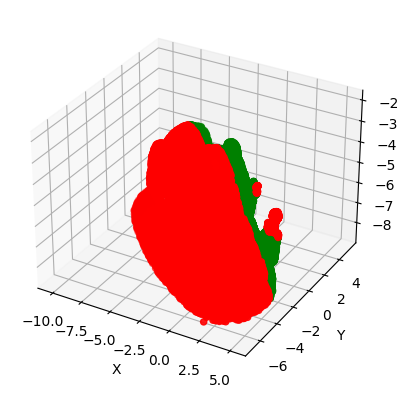

In [ ]:
"""
3D RANSAC implementation in python
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d


class RANSAC:
    """
    RANSAC Class
    """
    def __init__(self, point_cloud, max_iterations, distance_ratio_threshold):
        self.point_cloud = point_cloud
        self.max_iterations = max_iterations
        self.distance_ratio_threshold = distance_ratio_threshold

    def run(self):
        """
        method for running the class directly
        :return:
        """
        inliers, outliers = self._ransac_algorithm(self.max_iterations, self.distance_ratio_threshold)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(inliers["X"], inliers["Y"], inliers["Z"],c="green")
        ax.scatter(outliers["X"], outliers["Y"], outliers["Z"],c="red")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

    def _visualize_point_cloud(self):
        """
        Visualize the 3D data
        :return: None
        """
        # Visualize the point cloud data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(self.point_cloud["X"], self.point_cloud["Y"], self.point_cloud["Z"])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

    def _ransac_algorithm(self, max_iterations, distance_ratio_threshold):
        """
        Implementation of the RANSAC logic
        :return: inliers(Dataframe), outliers(Dataframe)
        """

        inliers_result = set()
        while max_iterations:
            max_iterations -= 1
            # Add 3 random indexes
            random.seed()
            inliers = []
            while len(inliers) < 3:
                random_index = random.randint(0, len(self.point_cloud.X)-1)
                inliers.append(random_index)
            # print(inliers)
            try:
                # In case of *.xyz data
                x1, y1, z1, _, _, _ = point_cloud.loc[inliers[0]]
                x2, y2, z2, _, _, _ = point_cloud.loc[inliers[1]]
                x3, y3, z3, _, _, _ = point_cloud.loc[inliers[2]]
            except:
                # In case of *.pcd data
                x1, y1, z1 = point_cloud.loc[inliers[0]]
                x2, y2, z2 = point_cloud.loc[inliers[1]]
                x3, y3, z3 = point_cloud.loc[inliers[2]]
            # Plane Equation --> ax + by + cz + d = 0
            # Value of Constants for inlier plane
            a = (y2 - y1)*(z3 - z1) - (z2 - z1)*(y3 - y1)
            b = (z2 - z1)*(x3 - x1) - (x2 - x1)*(z3 - z1)
            c = (x2 - x1)*(y3 - y1) - (y2 - y1)*(x3 - x1)
            d = -(a*x1 + b*y1 + c*z1)
            plane_lenght = max(0.1, math.sqrt(a*a + b*b + c*c))

            for point in self.point_cloud.iterrows():
                index = point[0]
                # Skip iteration if point matches the randomly generated inlier point
                if index in inliers:
                    continue
                try:
                    # In case of *.xyz data
                    x, y, z, _, _, _ = point[1]
                except:
                    # In case of *.pcd data
                    x, y, z = point[1]

                # Calculate the distance of the point to the inlier plane
                distance = math.fabs(a*x + b*y + c*z + d)/plane_lenght
                # Add the point as inlier, if within the threshold distancec ratio
                if distance <= distance_ratio_threshold:
                    inliers.append(index)
            # Update the set for retaining the maximum number of inlier points
            if len(inliers) > len(inliers_result):
                inliers_result.clear()
                inliers_result = inliers

        # Segregate inliers and outliers from the point cloud
        inlier_points = pd.DataFrame(columns=["X", "Y", "Z"])
        outlier_points = pd.DataFrame(columns=["X", "Y", "Z"])
        for point in point_cloud.iterrows():
            if point[0] in inliers_result:
                inlier_points = inlier_points._append({"X": point[1]["X"],
                                                      "Y": point[1]["Y"],
                                                      "Z": point[1]["Z"]}, ignore_index=True)
                continue
            outlier_points = outlier_points._append({"X": point[1]["X"],
                                                    "Y": point[1]["Y"],
                                                    "Z": point[1]["Z"]}, ignore_index=True)

        return inlier_points, outlier_points


if __name__ == "__main__":
    # Read the point cloud data
    point_cloud = pd.read_csv("point_cloud_data_sample.xyz", delimiter=" ", nrows=50000)
    point_cloud = point_cloud.iloc[:, :3]
    APPLICATION = RANSAC(point_cloud, max_iterations=5, distance_ratio_threshold=1)
    APPLICATION.run()

Uploadan .ply file i kod s yt videa https://www.youtube.com/watch?v=-OSVKbSsqT0&t=170s

In [13]:
import open3d as o3d
DATANAME = '/home/hasti/DPS/PointCloudAlgorithms/appartment_cloud.ply'
pcd = o3d.io.read_point_cloud(DATANAME)

#o3d.visualization.draw_geometries([pcd])
#cloud = np.asarray(pcd.points)



In [2]:
%pip install open3d

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 637.8 kB/s eta 0:00:0000:0100:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 KB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 KB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━

In [14]:
pcd_center = pcd.get_center()
pcd.translate(-pcd_center)

PointCloud with 1430779 points.

In [15]:
o3d.visualization.draw_geometries([pcd])

In [16]:
sample = pcd.random_down_sample(0.2)
o3d.visualization.draw_geometries([sample])

In [18]:
filtered, idx = pcd.remove_statistical_outlier(16, 10)
outliers = pcd.select_by_index(idx, invert=True)
outliers.paint_uniform_color([1,0,0])
o3d.visualization.draw_geometries([filtered, outliers])

In [19]:
downsample = filtered.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downsample])

In [21]:
downsample.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.2, max_nn=16), fast_normal_computation=True)
downsample.paint_uniform_color([0.6, 0.6, 0.6])
o3d.visualization.draw_geometries([downsample,outliers])